In [1]:
import sys
sys.path.append("D:/PKM/Github/Eurostat/codice")  # Aggiunge il path dove si trova il modulo
from eurostat_utils import fetch_eurostat_data # questa è la mia funzione per estrarre i json

In [23]:
df = fetch_eurostat_data("sts_inpr_m", {
    "geo": "IT",
    "unit": "I21",
    "s_adj": "NSA", # NSA, CA
    "nace_r2": ["B-D"],
})


In [15]:
df['time'].min(), df['time'].max(),

(Timestamp('1990-01-01 00:00:00'), Timestamp('2025-01-01 00:00:00'))

In [16]:
df[['nace_r2_label',  'unit_label', 'geo_code','time_label', 'value', 'time']].sort_values(by='time').tail(20)

,nace_r2_label,unit_label,geo_code,time_label,value,time
121,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2020-Q2,76.6,2020-04-01
122,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2020-Q3,91.0,2020-07-01
123,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2020-Q4,97.4,2020-10-01
124,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2021-Q1,99.9,2021-01-01
125,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2021-Q2,103.2,2021-04-01
126,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2021-Q3,95.1,2021-07-01
127,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2021-Q4,101.8,2021-10-01
128,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2022-Q1,102.7,2022-01-01
129,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2022-Q2,104.2,2022-04-01
130,Mining and quarrying; manufacturing; electrici...,"Index, 2021=100",IT,2022-Q3,94.0,2022-07-01


In [17]:
df[['time', 'value']].sort_values(by='time').tail(20).reset_index(drop=True)

,time,value
0,2020-04-01,76.6
1,2020-07-01,91.0
2,2020-10-01,97.4
3,2021-01-01,99.9
4,2021-04-01,103.2
5,2021-07-01,95.1
6,2021-10-01,101.8
7,2022-01-01,102.7
8,2022-04-01,104.2
9,2022-07-01,94.0


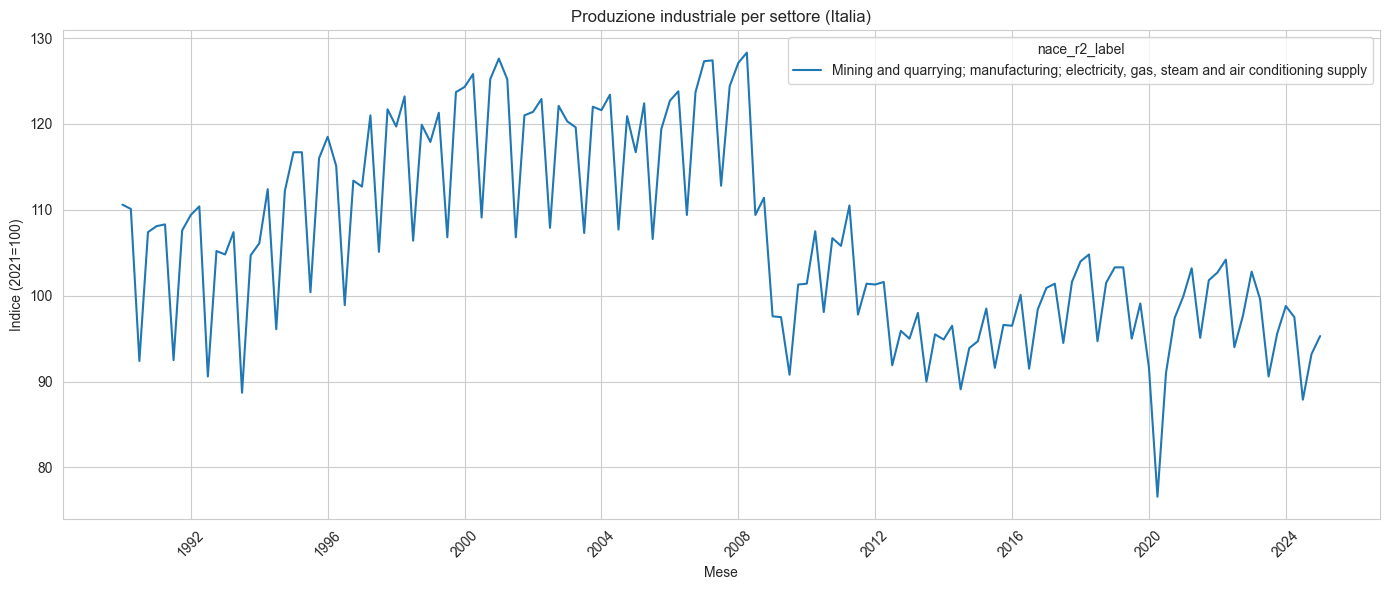

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot per visualizzazione
df_plot = df.pivot_table(
    index='time', 
    columns='nace_r2_label', 
    values='value'
)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_plot)
plt.title("Produzione industriale per settore (Italia)")
plt.ylabel("Indice (2021=100)")
plt.xlabel("Mese")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Nel grafico della produzione industriale italiana si notano due **forti crolli**:



### 📉 **2008–2009: Crisi finanziaria globale**

* **Cosa è successo**: crollo dei mercati finanziari innescato dal fallimento di Lehman Brothers (settembre 2008), con conseguente credit crunch globale.
* **Effetti sull'industria italiana**:

  * Crollo della domanda globale.
  * Stretta creditizia per imprese.
  * Caduta dell’export e dei consumi interni.
* 📉 L'indice industriale italiano scese **di oltre il 20%** nel giro di pochi mesi.


### 📉 **2020: Pandemia di COVID-19**

* **Cosa è successo**: lockdown globali, blocco delle filiere produttive, chiusura delle attività non essenziali.
* **Effetti sull’Italia**:

  * Interruzione della produzione industriale (soprattutto marzo–aprile 2020).
  * Caduta improvvisa di domanda e offerta.
* 📉 L'indice toccò **il minimo storico** dal 1990 a oggi.


### 🔁 In entrambi i casi:

* I settori più colpiti: **automotive, moda, meccanica, energia**.
* Il rimbalzo post-crisi c’è stato, ma **mai con pieno recupero dei livelli pre-2008**.

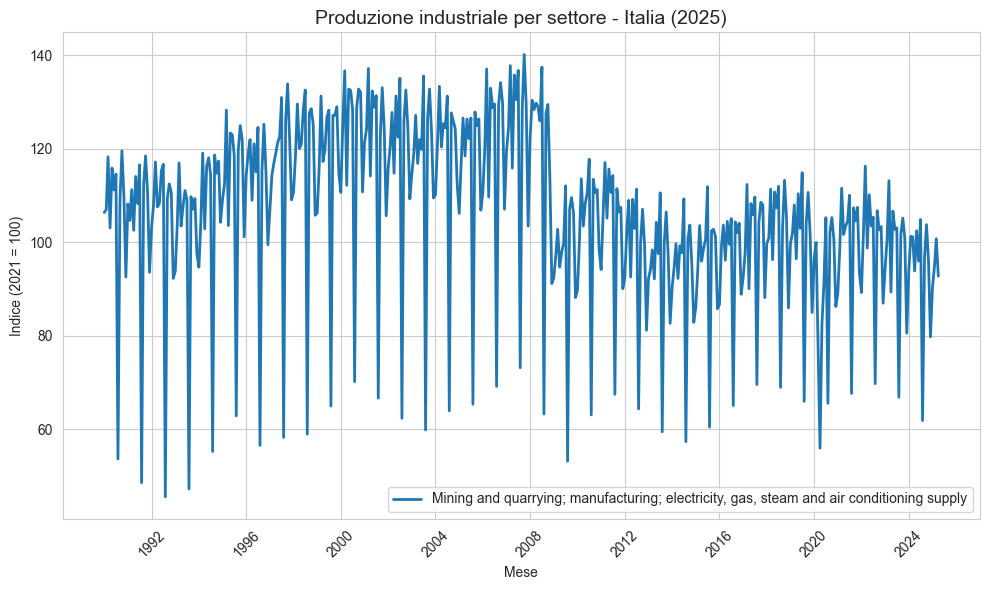

In [13]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("tab10", n_colors=len(df_plot.columns))

for i, col in enumerate(df_plot.columns):
    sns.lineplot(x=df_plot.index, y=df_plot[col], label=col, color=palette[i], linewidth=2)

plt.title("Produzione industriale per settore - Italia (2025)", fontsize=14)
plt.ylabel("Indice (2021 = 100)")
plt.xlabel("Mese")
plt.xticks(rotation=45)
# plt.legend(title="Settore", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()




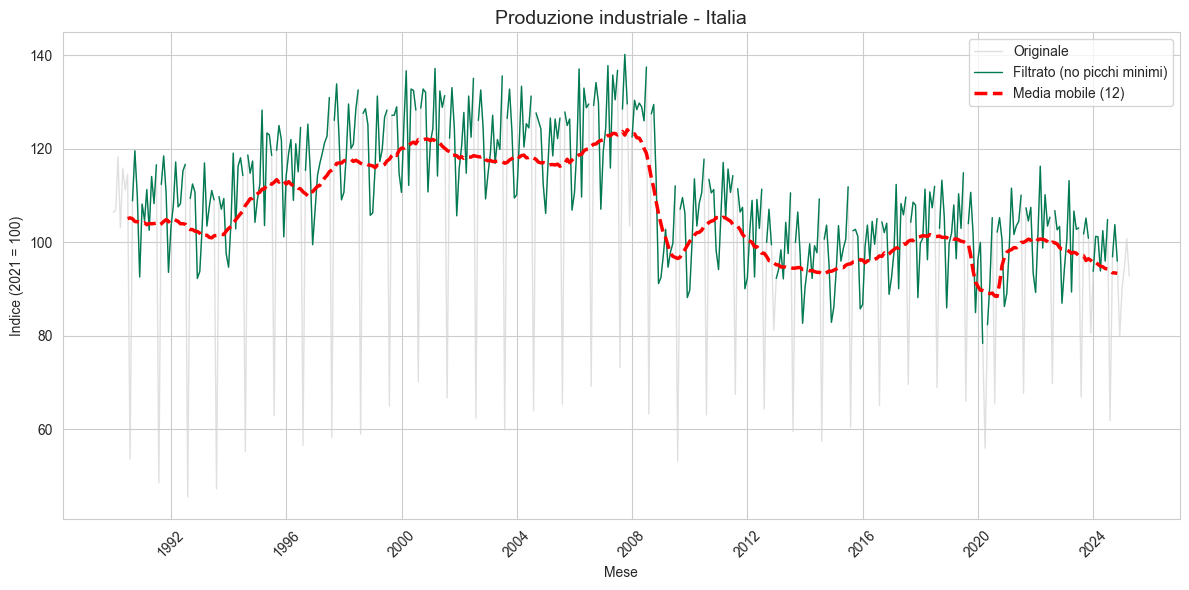

In [32]:
# Calcolo media mobile a 12 mesi
df['ma12'] = df['value'].rolling(window=12, center=True).mean()

# Definizione soglia inferiore (es. 75% della media mobile)
soglia = 0.85
df['filtered'] = df.apply(lambda row: row['value'] if row['value'] > soglia * row['ma12'] else None, axis=1)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(df['time'], df['value'], label="Originale", color='lightgray', linewidth=1, alpha=0.7)
plt.plot(df['time'], df['filtered'], label="Filtrato (no picchi minimi)", color='#007a53', linewidth=1)
plt.plot(df['time'], df['ma12'], label="Media mobile (12)", color='red', linestyle='--', linewidth=2.5)

plt.title("Produzione industriale - Italia", fontsize=14)
plt.xlabel("Mese")
plt.ylabel("Indice (2021 = 100)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## settori più 

In [33]:
df = fetch_eurostat_data("sts_inpr_m", {
    "geo": "IT",
    "unit": "I21",
    "s_adj": "NSA", # NSA, CA
    "time": ['2025-01','2025-02','2025-03','2025-04']
    })

In [35]:
# Calcolo escursione (range) per ciascun settore
agg = (
    df.groupby("nace_r2_label")["value"]
    .agg(["min", "max"])
    .assign(escursione=lambda x: x["max"] - x["min"])
    .sort_values("escursione", ascending=False)
)


In [36]:
agg

,min,max,escursione
nace_r2_label,,,
Manufacture of weapons and ammunition,48.0,127.1,79.1
Manufacture of ice cream,101.8,173.2,71.4
Manufacture of pesticides and other agrochemical products,76.8,146.9,70.1
"Manufacture of bricks, tiles and construction products, in baked clay",39.0,102.7,63.7
Manufacture of motorcycles,82.6,143.0,60.4
...,...,...,...
"Manufacture of textiles, wearing apparel, leather and related products",82.8,87.4,4.6
Repair of electrical equipment,123.8,128.4,4.6
Manufacture of paper stationery,74.5,78.8,4.3


In [39]:
# Calcola min, max e escursione per ciascun settore
df_range = (
    df.groupby("nace_r2_label")["value"]
    .agg(["min", "max"])
    .assign(escursione=lambda d: d["max"] - d["min"])
)

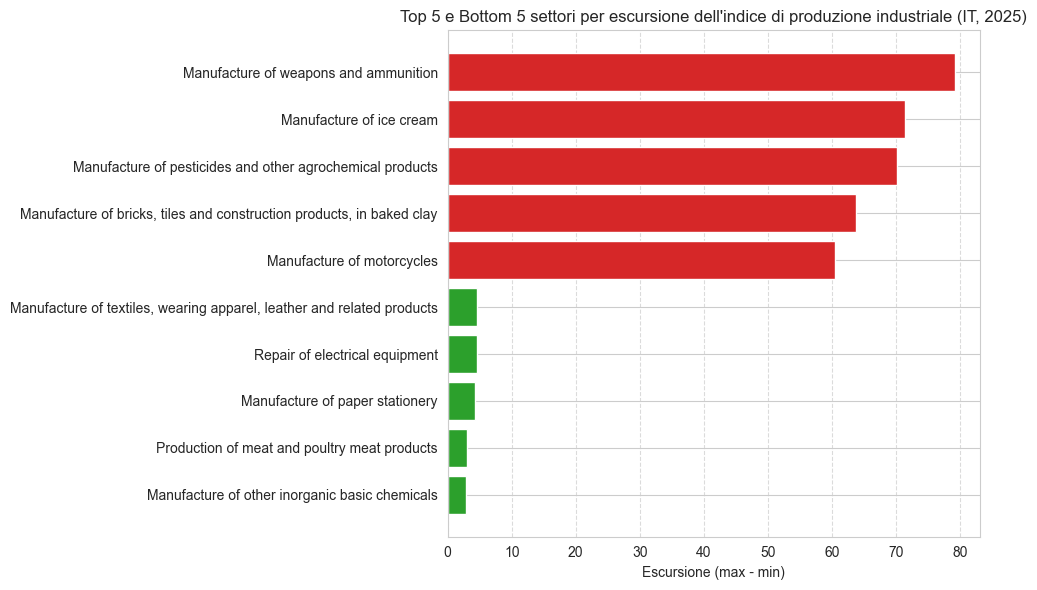

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Ordina per escursione
df_range_sorted = df_range.sort_values(by="escursione", ascending=False)

# Seleziona top 5 e bottom 5
top5 = df_range_sorted.head(5)
bottom5 = df_range_sorted.tail(5)

# Unisci per la visualizzazione
df_plot = pd.concat([top5, bottom5])

# Colori diversi per top e bottom
colors = ['tab:red']*5 + ['tab:green']*5

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_plot.index, df_plot["escursione"], color=colors)
plt.xlabel("Escursione (max - min)")
plt.title("Top 5 e Bottom 5 settori per escursione dell'indice di produzione industriale (IT, 2025)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [42]:
df['dev_from_base'] = df['value'] - 100

df_dev = (
    df.groupby('nace_r2_label')['dev_from_base']
    .agg(['min', 'max'])
    .assign(escursione=lambda x: x['max'] - x['min'])
    .sort_values('escursione', ascending=False)
)



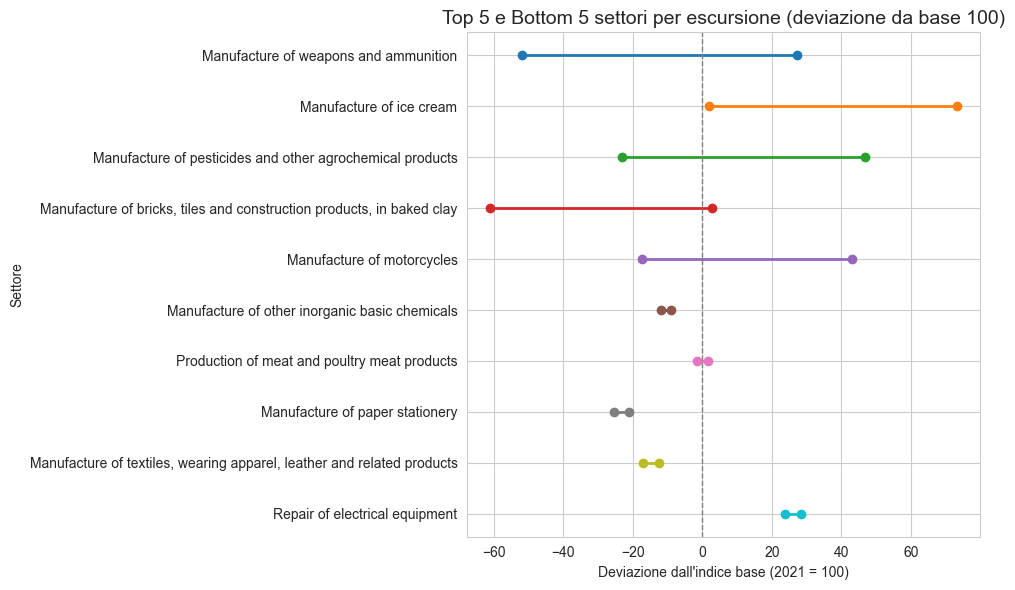

In [44]:
# Ricreazione del DataFrame df_top_bottom dai dati già disponibili

# Ricalcoliamo il dataframe con le escursioni
agg = df.groupby("nace_r2_label")["value"].agg(["min", "max"])
agg["escursione"] = agg["max"] - agg["min"]

# Top 5 e Bottom 5
top5 = agg.sort_values(by="escursione", ascending=False).head(5)
bottom5 = agg.sort_values(by="escursione", ascending=True).head(5)
df_top_bottom = pd.concat([top5, bottom5])

# Ora possiamo creare la versione centrata su 100
df_top_bottom_shifted = df_top_bottom.copy()
df_top_bottom_shifted['min'] -= 100
df_top_bottom_shifted['max'] -= 100
df_top_bottom_shifted['escursione'] = df_top_bottom_shifted['max'] - df_top_bottom_shifted['min']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
for idx, row in df_top_bottom_shifted.iterrows():
    ax.plot([row['min'], row['max']], [idx, idx], marker='o', linewidth=2)

ax.axvline(0, color='grey', linestyle='--', linewidth=1)
ax.set_title("Top 5 e Bottom 5 settori per escursione (deviazione da base 100)", fontsize=14)
ax.set_xlabel("Deviazione dall'indice base (2021 = 100)")
ax.set_ylabel("Settore")
plt.grid(True)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


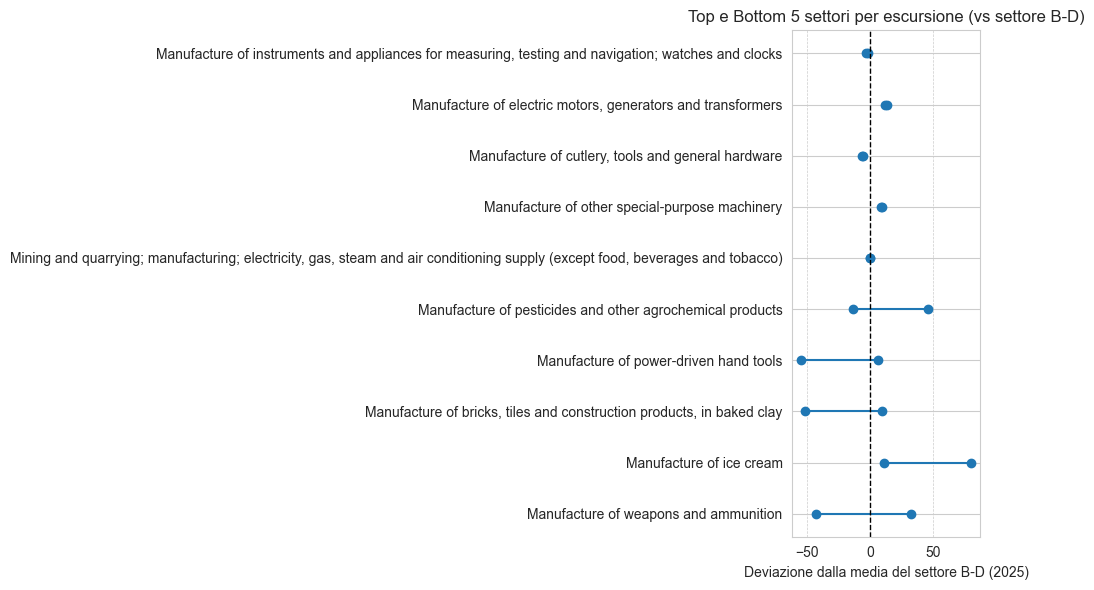

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Settore di riferimento: "B-D"
settore_riferimento = df[df['nace_r2_label'] == "Mining and quarrying; manufacturing; electricity, gas, steam and air conditioning supply"]
media_riferimento = settore_riferimento.groupby("time")["value"].mean()
scostamenti = df[df["nace_r2_label"] != "Mining and quarrying; manufacturing; electricity, gas, steam and air conditioning supply"].copy()
scostamenti = scostamenti.merge(media_riferimento, on="time", suffixes=("", "_ref"))
scostamenti["delta"] = scostamenti["value"] - scostamenti["value_ref"]

# Ricalcola escursione dei delta
oscillazione_df = scostamenti.groupby("nace_r2_label")["delta"].agg(["min", "max"])
oscillazione_df["escursione"] = oscillazione_df["max"] - oscillazione_df["min"]

# Seleziona top 5 e bottom 5 per escursione
top5 = oscillazione_df.sort_values("escursione", ascending=False).head(5)
bottom5 = oscillazione_df.sort_values("escursione", ascending=True).head(5)
oscillazione_top_bottom = pd.concat([top5, bottom5]).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
for i, row in oscillazione_top_bottom.iterrows():
    plt.plot([row["min"], row["max"]], [i, i], marker="o", color="tab:blue")
plt.axvline(0, color="black", linestyle="--", lw=1)
plt.yticks(range(len(oscillazione_top_bottom)), oscillazione_top_bottom["nace_r2_label"])
plt.xlabel("Deviazione dalla media del settore B-D (2025)")
plt.title("Top e Bottom 5 settori per escursione (vs settore B-D)")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.show()


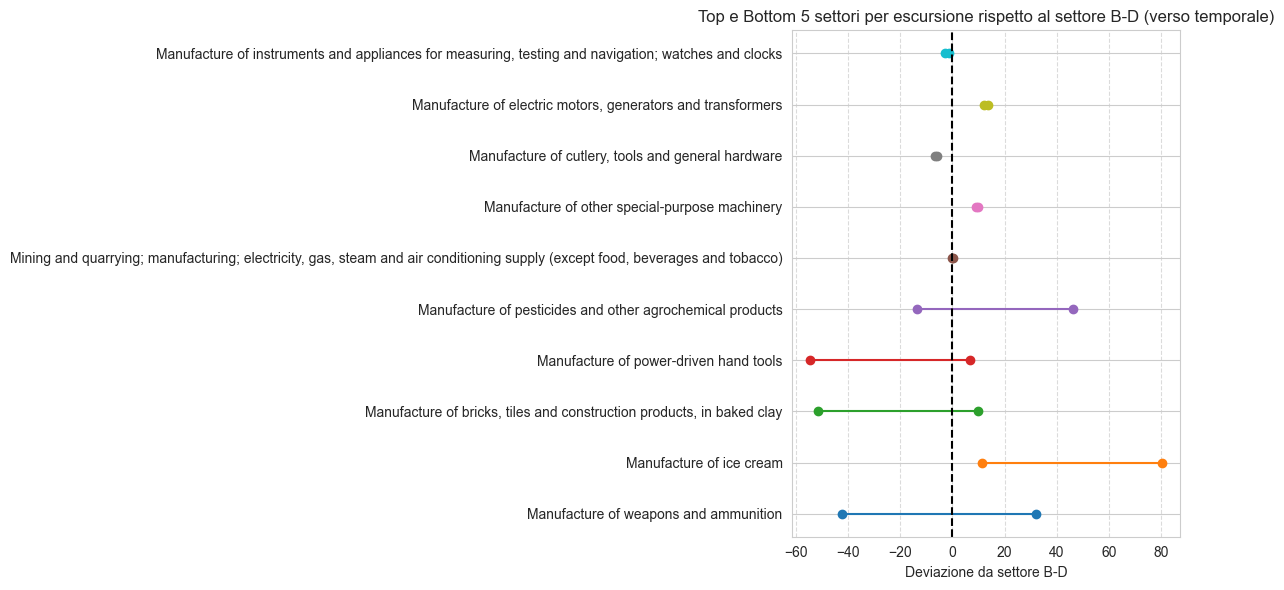

In [47]:
# Ricreiamo la variabile extremes basata sulla versione centrata (rispetto a "B-D")
escursioni = df_with_delta.groupby("nace_r2_label")["delta"].agg(["min", "max"])
escursioni["escursione"] = escursioni["max"] - escursioni["min"]
top5 = escursioni.sort_values("escursione", ascending=False).head(5)
bottom5 = escursioni.sort_values("escursione", ascending=True).head(5)
extremes = pd.concat([top5, bottom5])

# Calcoliamo la direzione temporale (min -> max) per ogni settore
def get_time_direction(group):
    min_val = group['delta'].min()
    max_val = group['delta'].max()
    min_time = group.loc[group['delta'] == min_val, 'time'].values[0]
    max_time = group.loc[group['delta'] == max_val, 'time'].values[0]
    return min_time < max_time

extremes['nace_r2_label'] = extremes.index
extremes['direction'] = extremes['nace_r2_label'].apply(
    lambda label: get_time_direction(df_with_delta[df_with_delta['nace_r2_label'] == label])
)

# Costruiamo il grafico con le barre orientate nel tempo
fig, ax = plt.subplots(figsize=(12, 6))

for i, row in extremes.iterrows():
    series = df_with_delta[df_with_delta['nace_r2_label'] == row['nace_r2_label']][['delta', 'time']].sort_values('time')
    min_val = row['min']
    max_val = row['max']
    if not row['direction']:
        min_val, max_val = max_val, min_val
    ax.plot([min_val, max_val], [i, i], marker='o')

ax.axvline(0, color='black', linestyle='--')
ax.set_yticks(range(len(extremes)))
ax.set_yticklabels(extremes['nace_r2_label'])
ax.set_title("Top e Bottom 5 settori per escursione rispetto al settore B-D (verso temporale)")
ax.set_xlabel("Deviazione da settore B-D")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


La **deviazione da `B-D`** (ossia il macrosettore *Mining and quarrying; manufacturing; electricity, gas, steam and air conditioning supply*) viene calcolata **sottraendo i valori di B-D** a ogni settore, **mese per mese**, come segue:

### Formula usata

Per ogni settore $S$ e mese $t$:

$$
\text{Deviazione}_{S,t} = \text{Valore}_{S,t} - \text{Valore}_{B-D,t}
$$

Poi, per misurare **l’escursione** (cioè l’ampiezza delle variazioni rispetto a B-D):

$$
\text{Escursione relativa}_S = \max_t(\text{Deviazione}_{S,t}) - \min_t(\text{Deviazione}_{S,t})
$$



### Esempio

Supponiamo che per **"Manufacture of weapons and ammunition"** (settore X), abbiamo:

| Mese    | Valore X | Valore B-D | Deviazione |
| ------- | -------- | ---------- | ---------- |
| 2025-01 | 48.0     | 100.0      | -52.0      |
| 2025-02 | 55.0     | 105.0      | -50.0      |
| 2025-03 | 110.0    | 108.0      | +2.0       |
| 2025-04 | 127.1    | 109.0      | +18.1      |

Quindi:

* Deviazioni: `[-52.0, -50.0, +2.0, +18.1]`
* Escursione relativa: `18.1 - (-52.0) = 70.1`

Nell'immagine originale c'è effettivamente un riferimento implicito all’indice generale B–D, ma **non come baseline costante**, bensì **come curva di riferimento per calcolare la deviazione di ciascun settore nel tempo.**


### Probabile logica del grafico:

Per ogni settore `S`, la barra rappresenta la **deviazione cumulata o media rispetto all’indice generale `B–D`**, calcolata su base mensile, come:

$$
\text{Deviazione}_{S,t} = \text{Valore}_{S,t} - \text{Valore}_{\text{B–D},t}
$$

Poi si sintetizza **per settore** con una di queste metriche:

* la **media** delle deviazioni:

  $$
  \bar{D}_S = \frac{1}{T} \sum_t (\text{Valore}_{S,t} - \text{B–D}_t)
  $$
* oppure la **somma delle deviazioni assolute**:

  $$
  \sum_t |\text{Valore}_{S,t} - \text{B–D}_t|
  $$
* oppure ancora l’**escursione relativa** (max - min della serie delle deviazioni).



### Verifica empirica da fare:

Hai già caricato un dataset con:

* `nace_r2_label`
* `time`
* `value` (indice, NSA)

e hai anche i dati per `"nace_r2": "B-D"`.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dati già disponibili: df (dati di tutti i settori) e df_bd (solo B-D)
# Verifica
unique_labels = df['nace_r2_label'].unique()
assert 'Mining and quarrying; manufacturing; electricity, gas, steam and air conditioning supply' in unique_labels

# Estrai solo B-D come riferimento
df_bd = df[df['nace_r2_label'] == 'Mining and quarrying; manufacturing; electricity, gas, steam and air conditioning supply']
df_bd = df_bd[['time', 'value']].rename(columns={'value': 'value_bd'})

# Merge dei valori per settore con il riferimento B-D
df_merged = df.merge(df_bd, on='time')
df_merged['deviazione'] = df_merged['value'] - df_merged['value_bd']

# Calcolo media e escursione per ciascun settore (escludendo B-D stesso)
df_summary = df_merged[df_merged['nace_r2_label'] != 'Mining and quarrying; manufacturing; electricity, gas, steam and air conditioning supply']
df_summary = df_summary.groupby('nace_r2_label')['deviazione'].agg(['mean', 'min', 'max']).reset_index()
df_summary['escursione'] = df_summary['max'] - df_summary['min']

# Seleziona top e bottom 5 per deviazione media
top5 = df_summary.nlargest(5, 'mean')
bottom5 = df_summary.nsmallest(5, 'mean')
df_vis = pd.concat([top5, bottom5]).sort_values('mean')

'''# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = ['#007A53' if x >= 0 else '#C8102E' for x in df_vis['mean']]  # Verde Eurostat / Rosso

bars = plt.barh(df_vis['nace_r2_label'], df_vis['mean'], color=palette)
plt.axvline(0, color='grey', linewidth=1)
plt.xlabel("Deviazione media rispetto a B–D (2025)")
plt.title("Settori con maggiore e minore scostamento dall’indice generale (B–D)")
plt.tight_layout()
plt.show()'''


'# Plot\nplt.figure(figsize=(10, 6))\nsns.set_style("whitegrid")\npalette = [\'#007A53\' if x >= 0 else \'#C8102E\' for x in df_vis[\'mean\']]  # Verde Eurostat / Rosso\n\nbars = plt.barh(df_vis[\'nace_r2_label\'], df_vis[\'mean\'], color=palette)\nplt.axvline(0, color=\'grey\', linewidth=1)\nplt.xlabel("Deviazione media rispetto a B–D (2025)")\nplt.title("Settori con maggiore e minore scostamento dall’indice generale (B–D)")\nplt.tight_layout()\nplt.show()'

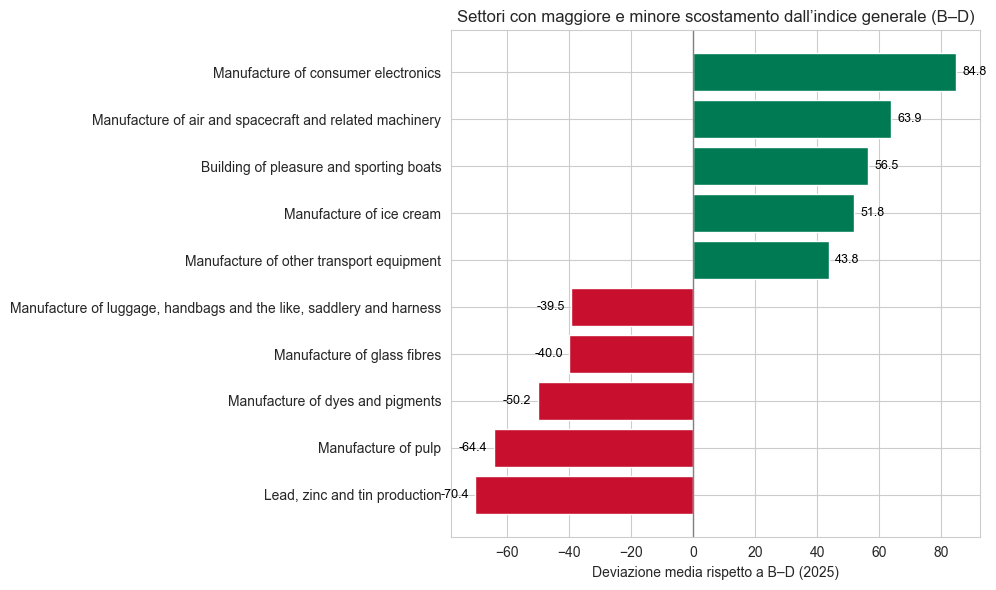

In [55]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = ['#007A53' if x >= 0 else '#C8102E' for x in df_vis['mean']]  # Verde Eurostat / Rosso

bars = plt.barh(df_vis['nace_r2_label'], df_vis['mean'], color=palette)
plt.axvline(0, color='grey', linewidth=1)
plt.xlabel("Deviazione media rispetto a B–D (2025)")
plt.title("Settori con maggiore e minore scostamento dall’indice generale (B–D)")

# Aggiunta etichette numeriche
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (2 if width >= 0 else -2),           # sposta testo a dx o sx
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1f}",
        ha='left' if width >= 0 else 'right',
        va='center',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()


In [56]:
df_vis


,nace_r2_label,mean,min,max,escursione
23,"Lead, zinc and tin production",-70.450,-71.6,-68.2,3.4
215,Manufacture of pulp,-64.425,-68.9,-57.5,11.4
84,Manufacture of dyes and pigments,-50.250,-60.2,-39.6,20.6
112,Manufacture of glass fibres,-40.050,-54.5,-13.1,41.4
134,"Manufacture of luggage, handbags and the like,...",-39.550,-49.8,-29.2,20.6
193,Manufacture of other transport equipment,43.800,38.6,47.2,8.6
119,Manufacture of ice cream,51.825,11.5,80.4,68.9
1,Building of pleasure and sporting boats,56.450,40.8,64.2,23.4
35,Manufacture of air and spacecraft and related ...,63.850,61.0,70.4,9.4
76,Manufacture of consumer electronics,84.750,69.2,93.8,24.6


## solo un mese

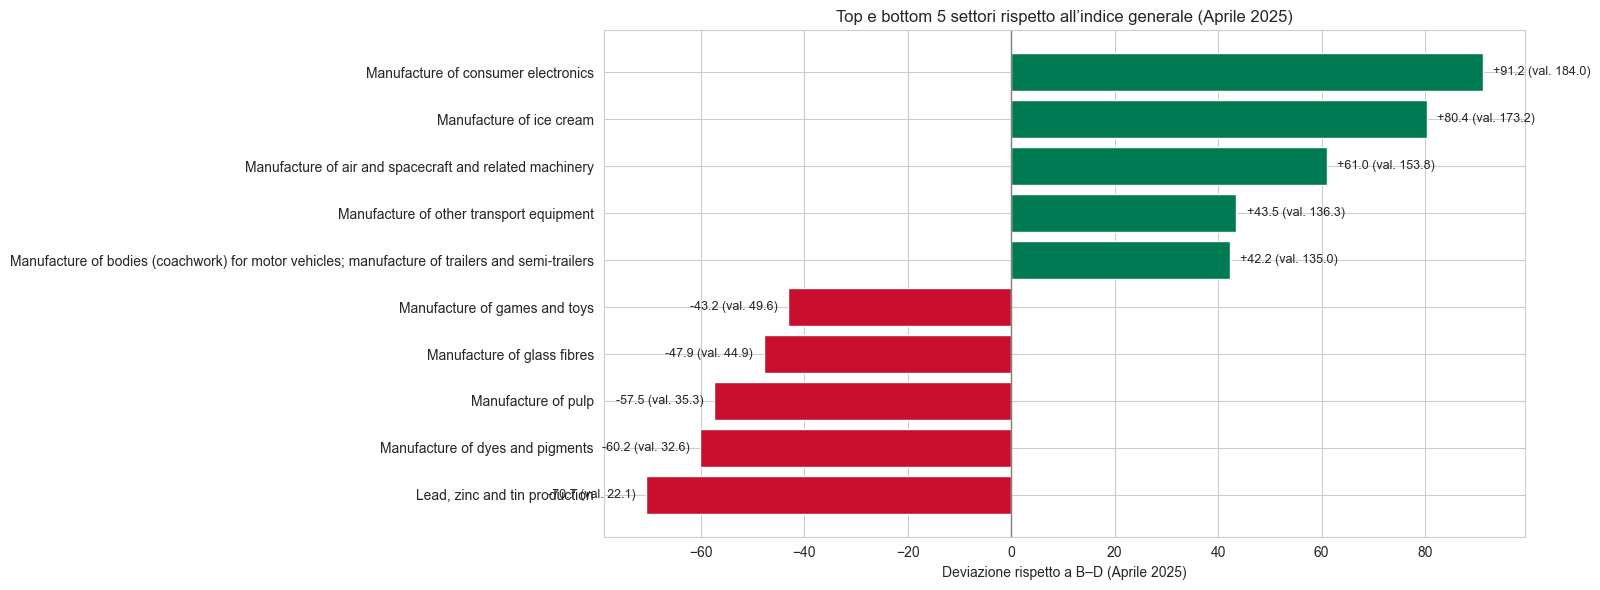

In [59]:
# Filtriamo i dati per solo aprile 2025
df_aprile = df[df['time'] == '2025-04-01'].copy()

# Aggiungiamo anche il valore dell'indice generale B-D per aprile
valore_bd_aprile = df_bd[df_bd['time'] == '2025-04-01']['value_bd'].values[0]
df_aprile['deviazione'] = df_aprile['value'] - valore_bd_aprile

# Escludiamo B-D dal confronto
df_aprile = df_aprile[df_aprile['nace_r2_label'] != 'Mining and quarrying; manufacturing; electricity, gas, steam and air conditioning supply']

# Selezioniamo top 5 e bottom 5
top5_aprile = df_aprile.nlargest(5, 'deviazione')
bottom5_aprile = df_aprile.nsmallest(5, 'deviazione')
df_vis_aprile = pd.concat([top5_aprile, bottom5_aprile]).sort_values('deviazione')

import matplotlib.pyplot as plt
import seaborn as sns

# Grafico con valori
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
palette = ['#007A53' if x >= 0 else '#C8102E' for x in df_vis_aprile['deviazione']]

bars = plt.barh(df_vis_aprile['nace_r2_label'], df_vis_aprile['deviazione'], color=palette)
plt.axvline(0, color='grey', linewidth=1)
plt.xlabel("Deviazione rispetto a B–D (Aprile 2025)")
plt.title("Top e bottom 5 settori rispetto all’indice generale (Aprile 2025)")

# Aggiungi etichette con deviazione e valore assoluto
for bar, val, dev in zip(bars, df_vis_aprile['value'], df_vis_aprile['deviazione']):
    xpos = bar.get_width()
    label = f"{dev:+.1f} (val. {val:.1f})"
    plt.text(
        xpos + (2 if xpos >= 0 else -2),
        bar.get_y() + bar.get_height() / 2,
        label,
        ha='left' if xpos >= 0 else 'right',
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()


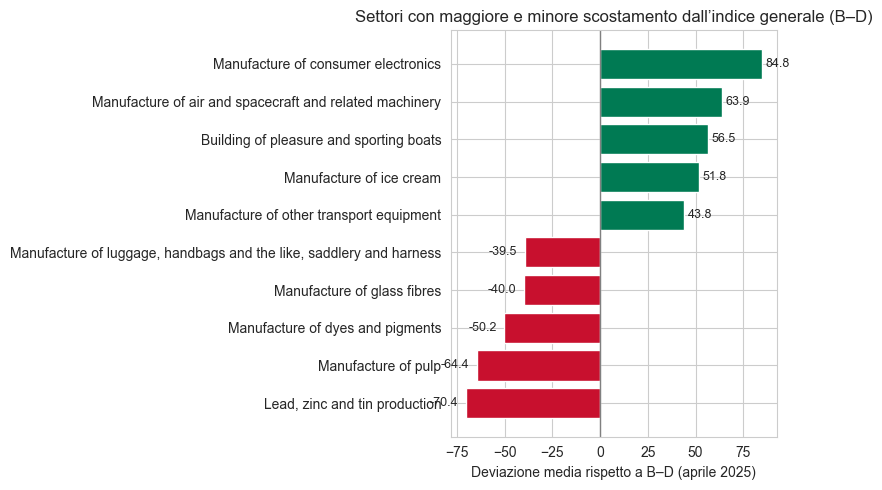

In [60]:
plt.figure(figsize=(8, 5))  # Ridotto da (10, 6)
sns.set_style("whitegrid")
palette = ['#007A53' if x >= 0 else '#C8102E' for x in df_vis['mean']]  # Verde/Rosso

bars = plt.barh(df_vis['nace_r2_label'], df_vis['mean'], color=palette)

# Aggiungi etichette sulle barre
for bar, value in zip(bars, df_vis['mean']):
    plt.text(bar.get_width() + (2 if value >= 0 else -4),   # posizione testuale
             bar.get_y() + bar.get_height()/2,
             f"{value:.1f}",
             va='center',
             ha='left' if value >= 0 else 'right',
             fontsize=9)

plt.axvline(0, color='grey', linewidth=1)
plt.xlabel("Deviazione media rispetto a B–D (aprile 2025)")
plt.title("Settori con maggiore e minore scostamento dall’indice generale (B–D)")
plt.tight_layout()
plt.show()


<positron-console-cell-61>:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.


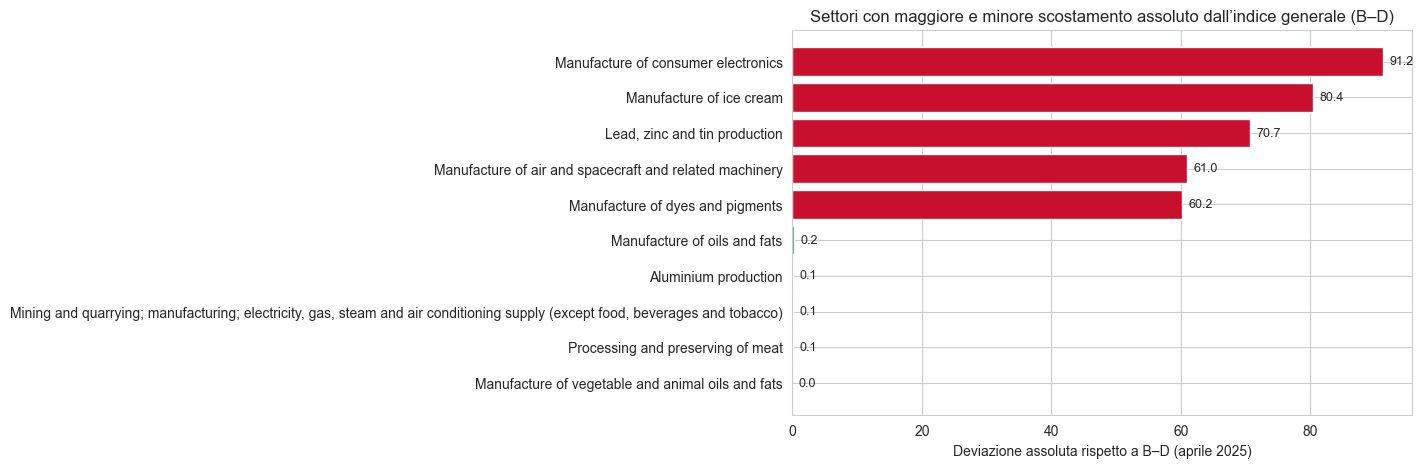

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtro solo per aprile 2025
df_apr = df_merged[df_merged["time"] == "2025-04-01"].copy()
df_apr = df_apr[df_apr['nace_r2_label'] != 'Mining and quarrying; manufacturing; electricity, gas, steam and air conditioning supply']
df_apr['dev_abs'] = (df_apr['value'] - df_apr['value_bd']).abs()

# Selezione top e bottom 5 per valore assoluto della deviazione
top5_abs = df_apr.nlargest(5, 'dev_abs')
bottom5_abs = df_apr.nsmallest(5, 'dev_abs')
df_vis_abs = pd.concat([top5_abs, bottom5_abs]).sort_values('dev_abs')

# Plot
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
palette_abs = ['#007A53'] * 5 + ['#C8102E'] * 5  # Verde per top, rosso per bottom

bars = plt.barh(df_vis_abs['nace_r2_label'], df_vis_abs['dev_abs'], color=palette_abs)

# Aggiunta dei valori
for bar, value in zip(bars, df_vis_abs['dev_abs']):
    plt.text(bar.get_width() + 1,
             bar.get_y() + bar.get_height()/2,
             f"{value:.1f}",
             va='center', ha='left', fontsize=9)

plt.xlabel("Deviazione assoluta rispetto a B–D (aprile 2025)")
plt.title("Settori con maggiore e minore scostamento assoluto dall’indice generale (B–D)")
plt.tight_layout()
plt.show()


In [66]:
df_apr[['nace_r2_code','nace_r2_label','value']].sort_values(by='value', ascending=False)

,nace_r2_code,nace_r2_label,value
851,C264,Manufacture of consumer electronics,184.0
155,C1052,Manufacture of ice cream,173.2
1063,C303,Manufacture of air and spacecraft and related ...,153.8
1043,C30,Manufacture of other transport equipment,136.3
1027,C292,Manufacture of bodies (coachwork) for motor ve...,135.0
...,...,...,...
1119,C324,Manufacture of games and toys,49.6
591,C2314,Manufacture of glass fibres,44.9
383,C1711,Manufacture of pulp,35.3
459,C2012,Manufacture of dyes and pigments,32.6


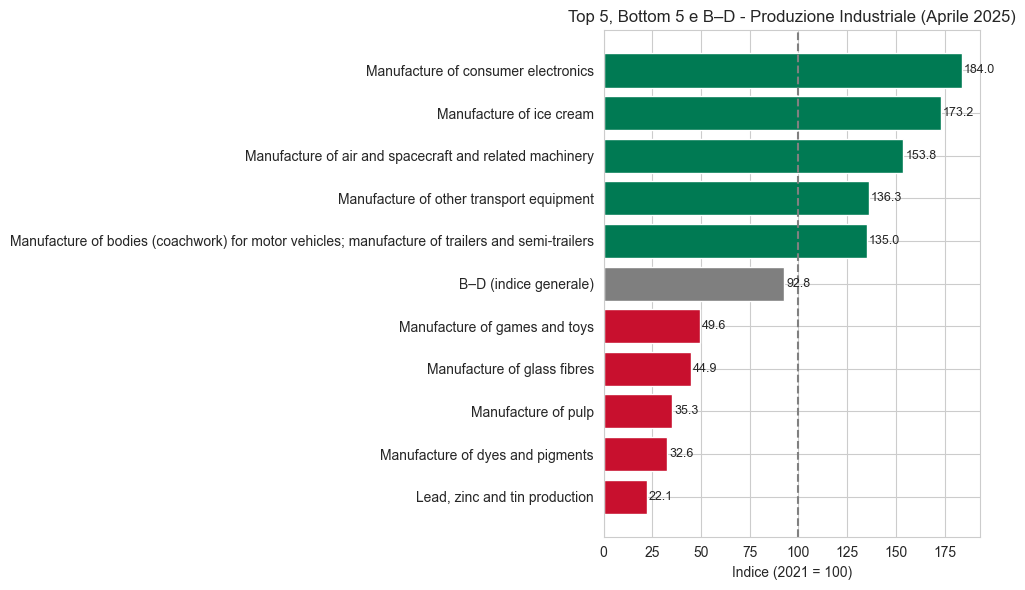

In [73]:
# Ricontrolliamo con l'informazione corretta: B-D è identificato tramite `nace_r2_code`, non `nace_r2_label`

# Estrai i top5 e bottom5 settori in base a valore
df_apr_all = df[df['time'] == '2025-04-01']
top5_apr = df_apr_all[['nace_r2_code', 'nace_r2_label', 'value']].sort_values(by='value', ascending=False).head(5)
bottom5_apr = df_apr_all[['nace_r2_code', 'nace_r2_label', 'value']].sort_values(by='value', ascending=False).tail(5)

# Controlla se 'B-D' è presente tra top o bottom usando la colonna nace_r2_code
bd_code = 'B-D'
bd_present = bd_code in top5_apr['nace_r2_code'].values or bd_code in bottom5_apr['nace_r2_code'].values

# Se non è presente, estrai da df e rinomina l'etichetta
if not bd_present:
    bd_apr_val = df_apr_all[df_apr_all['nace_r2_code'] == bd_code][['nace_r2_code', 'nace_r2_label', 'value']].copy()
    bd_apr_val['nace_r2_label'] = 'B–D (indice generale)'
else:
    bd_apr_val = pd.DataFrame(columns=['nace_r2_code', 'nace_r2_label', 'value'])  # vuoto

# Costruisci il dataset finale per la visualizzazione
df_vis_apr = pd.concat([top5_apr, bottom5_apr, bd_apr_val]).drop_duplicates(subset='nace_r2_code')

# Ordina per valore decrescente
df_vis_apr = df_vis_apr.sort_values(by='value', ascending=False)

# Colori per le barre
colors = ['#7F7F7F' if code == 'B-D' or lbl == 'B–D (indice generale)' 
          else '#007A53' if val >= 100 else '#C8102E' 
          for code, lbl, val in zip(df_vis_apr['nace_r2_code'], df_vis_apr['nace_r2_label'], df_vis_apr['value'])]

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bars = plt.barh(df_vis_apr['nace_r2_label'], df_vis_apr['value'], color=colors)

# Aggiungi valore numerico accanto a ogni barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f"{width:.1f}", va='center', fontsize=9)

plt.axvline(x=100, color='grey', linestyle='--')
plt.xlabel("Indice (2021 = 100)")
plt.title("Top 5, Bottom 5 e B–D - Produzione Industriale (Aprile 2025)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


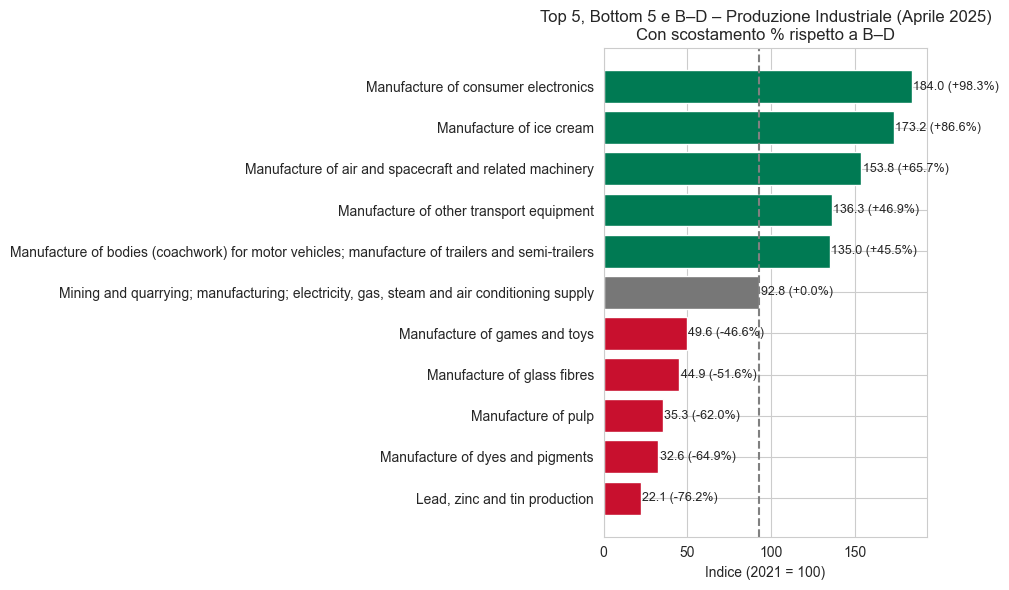

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estrai solo il mese di interesse
df_apr = df[df['time'] == '2025-04-01'].copy()

# Estrai B–D
bd_value = df_apr[df_apr['nace_r2_code'] == 'B-D']['value'].values[0]

# Calcola scostamento %
df_apr['scostamento_pct'] = (df_apr['value'] - bd_value) / bd_value * 100

# Seleziona top 5 e bottom 5 per valore assoluto
top5_apr = df_apr.sort_values(by='value', ascending=False).head(5)
bottom5_apr = df_apr.sort_values(by='value', ascending=True).head(5)
bd_row = df_apr[df_apr['nace_r2_code'] == 'B-D']
df_vis_apr = pd.concat([top5_apr, bottom5_apr, bd_row]).drop_duplicates().sort_values(by='value', ascending=True)

# Colori
colors = df_vis_apr['nace_r2_code'].apply(lambda x: 
    '#007A53' if x not in ['B-D'] and df_apr.set_index('nace_r2_code').loc[x, 'value'] > bd_value else
    '#C8102E' if x not in ['B-D'] else '#777777'
)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_vis_apr['nace_r2_label'], df_vis_apr['value'], color=colors)

# Aggiungi i valori e lo scostamento %
for bar, val, pct in zip(bars, df_vis_apr['value'], df_vis_apr['scostamento_pct']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{val:.1f} ({pct:+.1f}%)", va='center', fontsize=9)

plt.axvline(bd_value, color='gray', linestyle='--')
plt.xlabel("Indice (2021 = 100)")
plt.title("Top 5, Bottom 5 e B–D – Produzione Industriale (Aprile 2025)\nCon scostamento % rispetto a B–D")
plt.tight_layout()
plt.show()


Il grafico finale mostra in modo chiaro:

I 5 settori con la produzione industriale più alta rispetto all’indice generale B–D (in verde),

I 5 settori con la produzione più bassa (in rosso),

Il valore di riferimento B–D (in grigio),

E lo scostamento percentuale rispetto a B–D, per ciascun settore.

In [102]:
df_pivot

time,nace_r2_code,nace_r2_label,2025-03-01 00:00:00,2025-04-01 00:00:00
0,B,Mining and quarrying,96.3,96.0
1,B-D_X_FOOD,Mining and quarrying; manufacturing; electrici...,101.0,92.9
2,B06,Extraction of crude petroleum and natural gas,86.9,87.4
3,B061,Extraction of crude petroleum,85.7,87.7
4,B062,Extraction of natural gas,104.2,93.9
...,...,...,...,...
289,MIG_DCOG,MIG - durable consumer goods,103.9,94.7
290,MIG_ING,MIG - intermediate goods,98.7,90.2
291,MIG_NDCOG,MIG - non-durable consumer goods,97.2,89.2
292,MIG_NRG_X_D_E,MIG - energy (except sections D and E),89.1,91.6


In [103]:
df_pivot.columns

Index(['nace_r2_code', 'nace_r2_label', 2025-03-01 00:00:00,
       2025-04-01 00:00:00],
      dtype='object', name='time')

In [108]:
# Teniamo solo marzo e aprile 2025
df_diff = df[df['time'].isin(['2025-03-01', '2025-04-01'])].copy()

# Pivot usando sia codice che label
df_pivot = df_diff.pivot_table(
    index=['nace_r2_code', 'nace_r2_label'],
    columns='time',
    values='value',
    aggfunc='mean'
).reset_index()

# Rinomina le colonne datetime in stringhe per riferimento sicuro
df_pivot.columns = [
    col.strftime("%Y-%m-%d") if isinstance(col, pd.Timestamp) else col
    for col in df_pivot.columns
]

# Calcolo della differenza aprile - marzo
df_pivot['diff_apr_mar'] = df_pivot['2025-04-01'] - df_pivot['2025-03-01']
# Calcolo della variazione percentuale
df_pivot['var_percentuale'] = ((df_pivot['2025-04-01'] / df_pivot['2025-03-01']) - 1) * 100
# Ordina per variazione
df_pivot = df_pivot.sort_values('diff_apr_mar', ascending=False)


<positron-console-cell-108>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.


In [109]:
df_pivot


,nace_r2_code,nace_r2_label,2025-03-01,2025-04-01,diff_apr_mar,var_percentuale
179,C254,Manufacture of weapons and ammunition,76.2,117.0,40.8,53.543307
45,C1105,Manufacture of beer,80.1,97.3,17.2,21.473159
226,C2824,Manufacture of power-driven hand tools,47.5,63.3,15.8,33.263158
141,C2341,Manufacture of ceramic household and ornamenta...,91.3,105.8,14.5,15.881709
66,C1439,Manufacture of other knitted and crocheted app...,73.6,87.4,13.8,18.750000
...,...,...,...,...,...,...
29,C1071,Manufacture of bread; manufacture of fresh pas...,106.5,77.3,-29.2,-27.417840
43,C1101,"Distilling, rectifying and blending of spirits",112.1,82.3,-29.8,-26.583408
251,C3012,Building of pleasure and sporting boats,165.0,133.6,-31.4,-19.030303
104,C2015,Manufacture of fertilisers and nitrogen compounds,117.9,83.0,-34.9,-29.601357


<positron-console-cell-125>:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


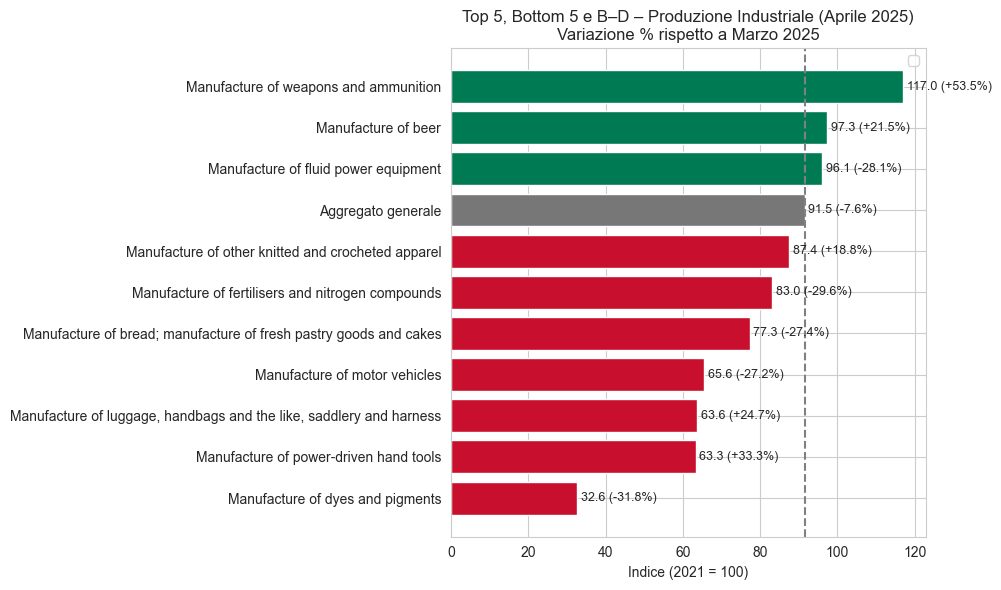

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Assicurati che 'time' sia in datetime
df['time'] = pd.to_datetime(df['time'])

# Filtra solo marzo e aprile 2025
df_filtered = df[df['time'].isin([pd.Timestamp("2025-03-01"), pd.Timestamp("2025-04-01")])].copy()

# Controlla se le colonne richieste esistono
required_cols = ['nace_r2_code', 'nace_r2_label', 'value', 'time']
if not all(col in df_filtered.columns for col in required_cols):
    raise ValueError("Colonne richieste mancanti: " + str(set(required_cols) - set(df_filtered.columns)))

# Pivot: riga = settore, colonne = mese, valori = indice
df_pivot = df_filtered.pivot_table(
    index=['nace_r2_code', 'nace_r2_label'],
    columns='time',
    values='value',
    aggfunc='mean'
).reset_index()

# Rinomina colonne temporali per facilità
df_pivot.columns.name = None
df_pivot = df_pivot.rename(columns={
    pd.Timestamp("2025-03-01"): 'marzo',
    pd.Timestamp("2025-04-01"): 'aprile'
})

# Calcola differenza e variazione percentuale
df_pivot['diff_apr_mar'] = df_pivot['aprile'] - df_pivot['marzo']
df_pivot['var_percentuale'] = df_pivot['diff_apr_mar'] / df_pivot['marzo'] * 100

# Calcola media semplice su tutto il dataset come B–D
bd_mar = df_pivot['marzo'].mean()
bd_apr = df_pivot['aprile'].mean()
bd_row = pd.DataFrame({
    'nace_r2_code': ['B-D'],
    'nace_r2_label': ['Aggregato generale'],
    'marzo': [bd_mar],
    'aprile': [bd_apr],
    'diff_apr_mar': [bd_apr - bd_mar],
    'var_percentuale': [(bd_apr - bd_mar) / bd_mar * 100]
})

# Seleziona top 5 e bottom 5 + B-D
top5 = df_pivot.nlargest(5, 'var_percentuale')
bottom5 = df_pivot.nsmallest(5, 'var_percentuale')
df_vis = pd.concat([top5, bottom5, bd_row]).drop_duplicates(subset='nace_r2_code')
df_vis = df_vis.sort_values(by='aprile', ascending=True)

# Colori
colors = df_vis.apply(
    lambda row: '#777777' if row['nace_r2_code'] == 'B-D'
    else '#007A53' if row['aprile'] > bd_apr
    else '#C8102E',
    axis=1
)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_vis['nace_r2_label'],
    df_vis['aprile'],
    color=colors
)

# Testi
for bar, val, pct in zip(bars, df_vis['aprile'], df_vis['var_percentuale']):
    plt.text(val + 1, bar.get_y() + bar.get_height()/2,
             f"{val:.1f} ({pct:+.1f}%)", va='center', fontsize=9)

plt.axvline(bd_apr, color='gray', linestyle='--',) # label='B–D (media semplice)'
plt.xlabel("Indice (2021 = 100)")
plt.title("Top 5, Bottom 5 e B–D – Produzione Industriale (Aprile 2025)\nVariazione % rispetto a Marzo 2025")
plt.legend()
plt.tight_layout()
plt.show()


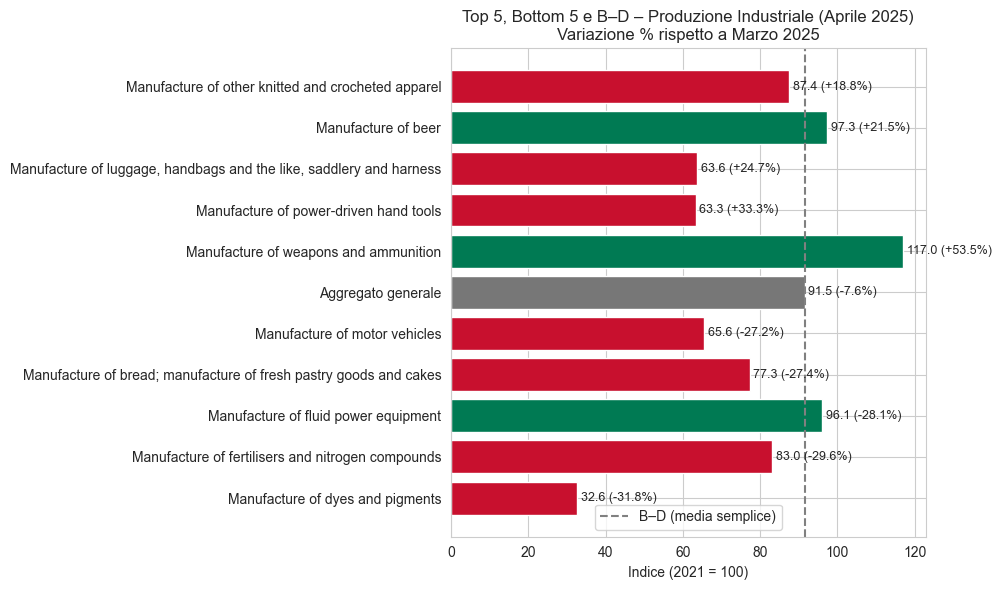

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Riordina: bottom5 → B–D → top5
top5 = df_pivot.nlargest(5, 'var_percentuale')
bottom5 = df_pivot.nsmallest(5, 'var_percentuale')
df_vis = pd.concat([bottom5, bd_row, top5]).drop_duplicates(subset='nace_r2_code')

# Colori: verde se sopra B–D, rosso se sotto, grigio per B–D
colors = df_vis['aprile'].apply(
    lambda x: '#777777' if x == bd_apr
    else '#007A53' if x > bd_apr
    else '#C8102E'
)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_vis['nace_r2_label'], df_vis['aprile'], color=colors)

# Aggiungi testo
for bar, val, pct in zip(bars, df_vis['aprile'], df_vis['var_percentuale']):
    plt.text(val + 1, bar.get_y() + bar.get_height()/2,
             f"{val:.1f} ({pct:+.1f}%)", va='center', fontsize=9)

# Linea verticale su B–D
plt.axvline(bd_apr, color='gray', linestyle='--', label='B–D (media semplice)')

plt.xlabel("Indice (2021 = 100)")
plt.title("Top 5, Bottom 5 e B–D – Produzione Industriale (Aprile 2025)\nVariazione % rispetto a Marzo 2025")
plt.legend()
plt.tight_layout()
plt.show()


# YoY

Per i settori riportati nel grafico, ecco i **codici NACE\_R2 Eurostat** più probabili (riferiti a livello **a 2 cifre** `Cxx`, cioè divisione):

| Settore nel grafico                                                                  | Codice NACE\_R2       | Descrizione Eurostat                                                       |
| ------------------------------------------------------------------------------------ | --------------------- | -------------------------------------------------------------------------- |
| **Industria legno, carta e stampa**                                                  | `C16`, `C17`, `C18`   | Fabbricazione di prodotti in legno, carta e stampa                         |
| **Fornitura di energia elettrica, gas, vapore, aria**                                | `D35`                 | Fornitura di energia elettrica, gas, vapore e aria condizionata            |
| **Computer, elettronica**                                                            | `C26`                 | Fabbricazione di computer e prodotti di elettronica                        |
| **Industrie alimentari, bevande, tabacco**                                           | `C10`, `C11`, `C12`   | Alimentari, bevande, tabacco                                               |
| **Attività estrattiva**                                                              | `B` (es. `B05`–`B09`) | Estrazione di minerali, petrolio, gas ecc.                                 |
| **Altre industrie**                                                                  | `C32`, `C33`          | Fabbricazione di altri prodotti, riparazione e installazione di macchinari |
| **Prodotti chimici**                                                                 | `C20`                 | Fabbricazione di prodotti chimici                                          |
| **Metallurgia e fabbricazione di prodotti in metallo (esclusi macchine e impianti)** | `C24`, `C25`          | Metallurgia e prodotti in metallo                                          |
| **Attività manifatturiere (indice generale)**                                        | `C`                   | Intero settore manifatturiero                                              |
| **Industrie tessili, abbigliamento, pelli e accessori**                              | `C13`, `C14`, `C15`   | Tessile, abbigliamento, pelli                                              |
| **Articoli in gomma, plastiche, minerali non metalliferi**                           | `C22`, `C23`          | Gomma e plastica; minerali non metalliferi                                 |
| **Fabbricazione macchinari, attrezzature n.c.a.**                                    | `C28`                 | Macchinari e attrezzature non classificati altrove                         |
| **Apparecchiature elettriche e non**                                                 | `C27`                 | Apparecchiature elettriche                                                 |
| **Coke e prodotti petroliferi raffinati**                                            | `C19`                 | Produzione di coke e raffinazione del petrolio                             |
| **Fabbricazione di mezzi di trasporto**                                              | `C29`, `C30`          | Mezzi di trasporto                                                         |
| **Prodotti farmaceutici di base e preparati**                                        | `C21`                 | Prodotti farmaceutici                                                      |

Se ti interessa, posso aiutarti a creare un dizionario `settore → codice/i NACE` o un filtro diretto su DataFrame. Vuoi procedere?


In [180]:
df = fetch_eurostat_data("sts_inpr_m", {
    "geo": "IT",
    "unit": "I21",
    "s_adj": "CA", # NSA, CA
    "time": ["2025-04","2024-04"],
})

# Pivot per avere le due date su colonne
df_pivot = df.pivot(index=["nace_r2_code", "nace_r2_label"], columns="time", values="value").reset_index()

# Rinomina le colonne datetime in stringhe per riferimento sicuro
df_pivot.columns = [
    col.strftime("%Y-%m-%d") if isinstance(col, pd.Timestamp) else col
    for col in df_pivot.columns
]

# Rinomina con i nomi corretti risultanti da strftime
df_pivot = df_pivot.rename(columns={
    "2024-04-01": "apr_2024",
    "2025-04-01": "apr_2025"
})

# Calcolo variazioni
df_pivot["var_annua_pct"] = (df_pivot["apr_2025"] - df_pivot["apr_2024"]) / df_pivot["apr_2024"] * 100
df_pivot["var_annua"] = (df_pivot["apr_2025"] - df_pivot["apr_2024"])

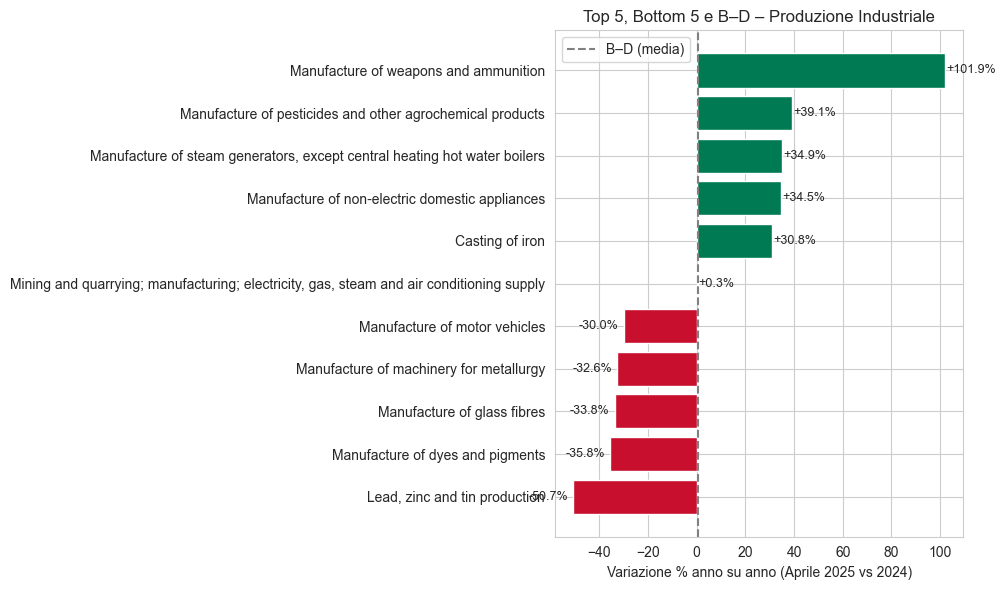

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ricalcolo top5, bottom5 e B-D (ora che abbiamo var_annua_pct)
top5 = df_pivot.nlargest(5, 'var_annua_pct')
bottom5 = df_pivot.nsmallest(5, 'var_annua_pct')
bd_row = df_pivot[df_pivot['nace_r2_code'] == 'B-D']

# Unione senza duplicati
df_vis = pd.concat([top5, bottom5, bd_row]).drop_duplicates(subset="nace_r2_code")
df_vis = df_vis.sort_values("var_annua_pct", ascending=True)

# Colori: verde sopra B–D, rosso sotto, grigio per B–D
bd_value = bd_row["var_annua_pct"].values[0] if not bd_row.empty else 0
colors = df_vis.apply(
    lambda row: '#777777' if row['nace_r2_code'] == 'B-D'
    else '#007A53' if row['var_annua_pct'] > bd_value
    else '#C8102E',
    axis=1
)

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bars = plt.barh(df_vis["nace_r2_label"], df_vis["var_annua_pct"], color=colors)

# Etichette con valore percentuale
for bar, val in zip(bars, df_vis["var_annua_pct"]):
    plt.text(val + (0.5 if val > 0 else -2), bar.get_y() + bar.get_height()/2,
             f"{val:+.1f}%", va='center', ha='left' if val > 0 else 'right', fontsize=9)

plt.axvline(bd_value, color='gray', linestyle='--', label='B–D (media)')
plt.xlabel("Variazione % anno su anno (Aprile 2025 vs 2024)")
plt.title("Top 5, Bottom 5 e B–D – Produzione Industriale")
plt.tight_layout()
plt.legend()
plt.show()


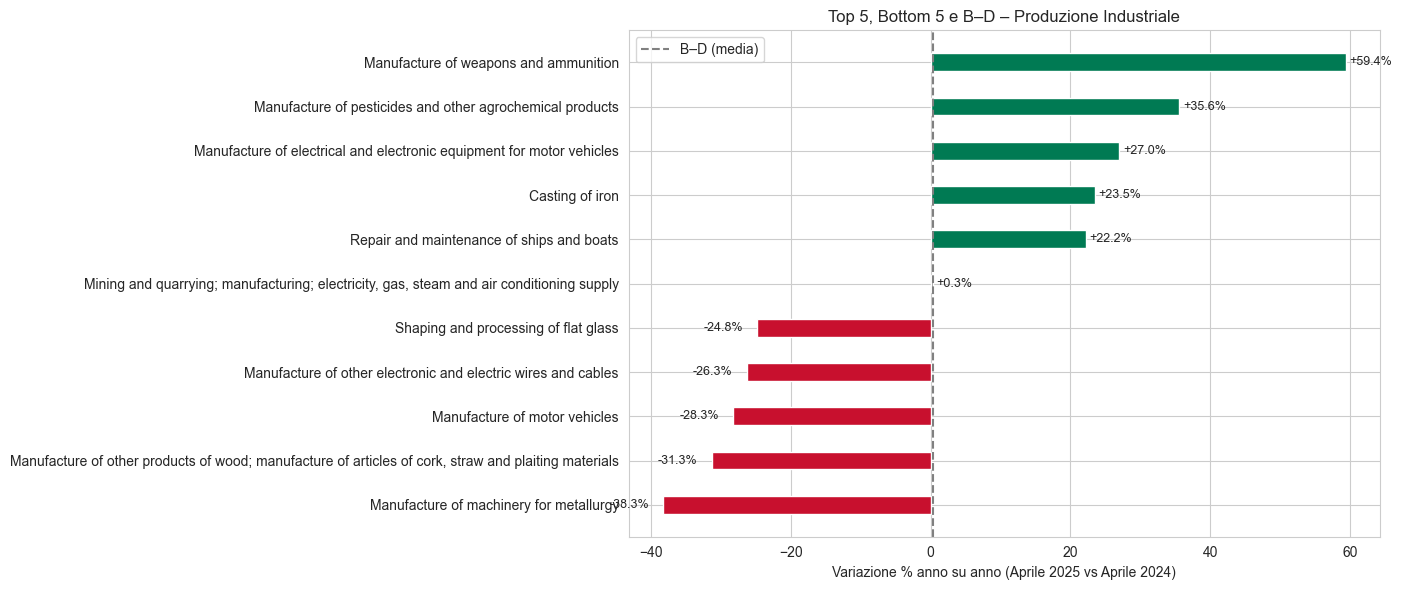

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ricalcolo top5, bottom5 e B–D
top5 = df_pivot.nlargest(5, 'var_annua')
bottom5 = df_pivot.nsmallest(5, 'var_annua')
bd_row = df_pivot[df_pivot['nace_r2_code'] == 'B-D']

# Unione e ordinamento
df_vis = pd.concat([top5, bottom5, bd_row]).drop_duplicates(subset="nace_r2_code")
df_vis = df_vis.sort_values("var_annua", ascending=True)

# Colori
bd_value = bd_row["var_annua"].values[0] if not bd_row.empty else 0
colors = df_vis.apply(
    lambda row: '#777777' if row['nace_r2_code'] == 'B-D'
    else '#007A53' if row['var_annua'] > bd_value
    else '#C8102E',
    axis=1
)

# Plot
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
bars = plt.barh(
    df_vis["nace_r2_label"],
    df_vis["var_annua"],
    color=colors,
    height=0.4  # Barre più strette
)

# Etichette
for bar, val in zip(bars, df_vis["var_annua"]):
    offset = 0.5 if val > 0 else -2
    ha = 'left' if val > 0 else 'right'
    plt.text(val + offset, bar.get_y() + bar.get_height()/2,
             f"{val:+.1f}%", va='center', ha=ha, fontsize=9)

plt.axvline(bd_value, color='gray', linestyle='--', label='B–D (media)')
plt.xlabel("Variazione % anno su anno (Aprile 2025 vs Aprile 2024)")
plt.title("Top 5, Bottom 5 e B–D – Produzione Industriale")
plt.legend()
plt.tight_layout()
plt.show()



In [183]:
df_pivot[df_pivot['nace_r2_code'].isin(['C16', 'B-D','C21'])]

,nace_r2_code,nace_r2_label,apr_2024,apr_2025,var_annua_pct,var_annua
1,B-D,Mining and quarrying; manufacturing; electrici...,93.5,93.8,0.320856,0.3
73,C16,Manufacture of wood and of products of wood an...,85.6,87.9,2.686916,2.3
118,C21,Manufacture of basic pharmaceutical products a...,118.6,105.6,-10.961214,-13.0


In [184]:
df[df['nace_r2_code'].isin(['C16', 'B-D','C21'])].sort_values(by = ['time_code','value'])[['nace_r2_code','nace_r2_label','time_code', 'value']]

,nace_r2_code,nace_r2_label,time_code,value
170,C16,Manufacture of wood and of products of wood an...,2024-04,85.6
6,B-D,Mining and quarrying; manufacturing; electrici...,2024-04,93.5
258,C21,Manufacture of basic pharmaceutical products a...,2024-04,118.6
171,C16,Manufacture of wood and of products of wood an...,2025-04,87.9
7,B-D,Mining and quarrying; manufacturing; electrici...,2025-04,93.8
259,C21,Manufacture of basic pharmaceutical products a...,2025-04,105.6


In [185]:
df[df['nace_r2_code'].str.startswith(('C16', 'C21'))][['nace_r2_code','nace_r2_label','time_code', 'value']]

,nace_r2_code,nace_r2_label,time_code,value
168,C16-C18,"Manufacture of wood, paper, printing and repro...",2024-04,83.1
169,C16-C18,"Manufacture of wood, paper, printing and repro...",2025-04,85.2
170,C16,Manufacture of wood and of products of wood an...,2024-04,85.6
171,C16,Manufacture of wood and of products of wood an...,2025-04,87.9
172,C161,Sawmilling and planing of wood,2024-04,68.1
173,C161,Sawmilling and planing of wood,2025-04,65.8
174,C162,"Manufacture of products of wood, cork, straw a...",2024-04,88.1
175,C162,"Manufacture of products of wood, cork, straw a...",2025-04,91.3
176,C1621,Manufacture of veneer sheets and wood-based pa...,2024-04,91.0
177,C1621,Manufacture of veneer sheets and wood-based pa...,2025-04,83.5


In [186]:
codici_nace = [
    'C16', 'C17', 'C18',      # Legno, carta, stampa
    'D35',                   # Energia, gas, vapore
    'C26',                   # Computer, elettronica
    'C10', 'C11', 'C12',     # Alimentari, bevande, tabacco
    #'B',                     # Estrazione minerali
    'C32', 'C33',            # Altre industrie (varie)
    'C20',                   # Prodotti chimici
    'C24', 'C25',            # Metallurgia e metallo
    'C13', 'C14', 'C15',     # Tessile, abbigliamento, pelli
    'C22', 'C23',            # Gomma, plastica, minerali non metalliferi
    'C28',                   # Macchinari n.c.a.
    'C27',                   # Apparecchiature elettriche
    'C19',                   # Coke e raffinazione
    'C29', 'C30',            # Mezzi di trasporto
    'C21',                    # Prodotti farmaceutici
    'B-D'
]
df_filtro = df_pivot[df_pivot['nace_r2_code'].isin(codici_nace)].copy()
df_filtro.sort_values(by = 'var_annua', ascending=False)

,nace_r2_code,nace_r2_label,apr_2024,apr_2025,var_annua_pct,var_annua
156,C24,Manufacture of basic metals,83.8,90.6,8.114558,6.8
13,C10,Manufacture of food products,91.4,96.4,5.470460,5.0
91,C18,Printing and reproduction of recorded media,63.9,68.4,7.042254,4.5
284,D35,"Electricity, gas, steam and air conditioning s...",87.0,90.7,4.252874,3.7
195,C26,"Manufacture of computer, electronic and optica...",106.8,110.3,3.277154,3.5
249,C30,Manufacture of other transport equipment,133.9,137.1,2.389843,3.2
273,C33,Repair and installation of machinery and equip...,106.2,108.7,2.354049,2.5
73,C16,Manufacture of wood and of products of wood an...,85.6,87.9,2.686916,2.3
48,C13,Manufacture of textiles,89.8,90.8,1.113586,1.0
99,C20,Manufacture of chemicals and chemical products,87.6,88.6,1.141553,1.0
